<a href="https://colab.research.google.com/github/sinha96/kaggel_dataset_analysis/blob/master/Car_price_machinehack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the Libraries ,connecting to the drive and loading the data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
data = pd.read_excel('/content/drive/My Drive/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_Train.xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Stats

In [0]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# Checking for the outliers

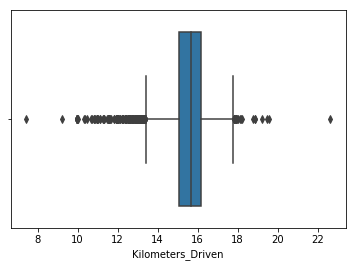

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(np.log2(data.Kilometers_Driven));

In [0]:
import scipy.stats as stats
z = stats.zscore(data.Kilometers_Driven)

In [0]:
np.where((data[abs(z)>3]))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,
         8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12]))

In [0]:
data.Kilometers_Driven.iloc[0]

72000

In [0]:
data[data.Seats == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [0]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [0]:
round(data.isnull().sum()/data.shape[0]*100,2)

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

# Data cleaning process

In [0]:
clean_data = data.drop('New_Price',axis=1)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
def clean_col(x):
  
  return str(x).split(' ')[0]

In [0]:
clean_data.Engine = clean_data.Engine.apply(clean_col)
clean_data.Power = clean_data.Power.apply(clean_col)
clean_data.Mileage = clean_data.Mileage.apply(clean_col)

In [0]:
clean_data['Company'] = clean_data.Name.apply(clean_col)

In [0]:
clean_data.Company = clean_data.Company.apply(lambda x : x.title())

In [0]:
clean_data.drop('Name',axis=1,inplace=True)

In [0]:
clean_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


In [0]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
Company              6019 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [0]:
clean_data.Location , location = pd.factorize(clean_data.Location)
clean_data.Year , year = pd.factorize(clean_data.Year)
clean_data.Fuel_Type , fuel = pd.factorize(clean_data.Fuel_Type)
clean_data.Transmission , transmission = pd.factorize(clean_data.Transmission)
clean_data.Owner_Type , owner_hand = pd.factorize(clean_data.Owner_Type)
clean_data.Company , company = pd.factorize(clean_data.Company)

In [0]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Location             6019 non-null int64
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int64
Transmission         6019 non-null int64
Owner_Type           6019 non-null int64
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
Company              6019 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 564.4+ KB


In [0]:
clean_data.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
Company               0
dtype: int64

In [0]:
clean_data.dropna(axis=0,inplace=True)

In [0]:
clean_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Company'],
      dtype='object')

In [0]:
clean_data.Mileage.unique()

array(['26.6', '19.67', '18.2', '20.77', '15.2', '21.1', '23.08', '11.36',
       '20.54', '22.3', '21.56', '16.8', '25.2', '12.7', '0.0', '13.5',
       '25.8', '28.4', '20.45', '14.84', '22.69', '23.65', '13.53',
       '18.5', '14.4', '20.92', '17.5', '12.8', '19.01', '14.53', '11.18',
       '12.4', '16.09', '14.0', '24.3', '18.15', '11.74', '22.07', '19.7',
       '25.4', '25.32', '14.62', '14.28', '14.9', '11.25', '24.4',
       '16.55', '17.11', '22.9', '17.8', '18.9', '15.04', '25.17',
       '20.36', '13.29', '13.68', '20.0', '15.8', '25.0', '16.4', '24.52',
       '22.1', '8.5', '15.1', '16.95', '19.64', '16.5', '18.53', '17.57',
       '18.0', '23.2', '16.73', '17.0', '13.0', '17.68', '22.7', '16.2',
       '15.26', '23.0', '19.83', '14.94', '17.71', '14.74', '16.0',
       '22.32', '12.99', '23.3', '19.15', '10.8', '15.0', '22.0', '21.9',
       '12.05', '11.7', '21.21', '20.73', '24.07', '19.0', '20.58',
       '19.27', '11.5', '18.6', '21.14', '11.05', '21.76', '7.81',
  

In [0]:
clean_data.Power.unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [0]:
clean_data.Engine.unique()

array(['998', '1582', '1199', '1248', '1968', '814', '1461', '2755',
       '1598', '1462', '1497', '2179', '2477', '1498', '2143', '1995',
       '1984', '1197', '2494', '1798', '2696', '2698', '1061', '1198',
       '2987', '796', '624', '1999', '1991', '2694', '1120', '2498',
       '799', '2393', '1399', '1796', '2148', '1396', '1950', '4806',
       '1998', '1086', '1193', '2982', '1493', '2967', '2993', '1196',
       '1799', '2497', '2354', '1373', '2996', '1591', '2894', '5461',
       '1595', '936', '1997', '1896', '1390', '1364', '2199', '993',
       '999', '1405', '2956', '1794', '995', '2496', '1599', '2400',
       '1495', '2523', '793', '4134', '1596', '1395', '2953', '1586',
       '2362', '1496', '1368', '1298', '1956', '1299', '3498', '2835',
       '1150', '3198', '1343', '1499', '1186', '1590', '2609', '2499',
       '2446', '1978', '2360', '3436', '2198', '4367', '2706', '1422',
       '2979', '1969', '1489', '2489', '1242', '1388', '1172', '2495',
       '1194', '

In [0]:
clean_data = clean_data.replace('nan',np.nan)
clean_data = clean_data.replace('null',np.nan)

In [0]:
clean_data.dropna(axis=0,inplace=True)
clean_data.Mileage = clean_data.Mileage.astype('float64')

In [0]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
Location             5872 non-null int64
Year                 5872 non-null int64
Kilometers_Driven    5872 non-null int64
Fuel_Type            5872 non-null int64
Transmission         5872 non-null int64
Owner_Type           5872 non-null int64
Mileage              5872 non-null float64
Engine               5872 non-null object
Power                5872 non-null object
Seats                5872 non-null float64
Price                5872 non-null float64
Company              5872 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 596.4+ KB


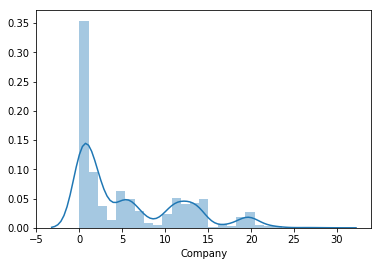

In [0]:
sns.distplot((clean_data.Company))

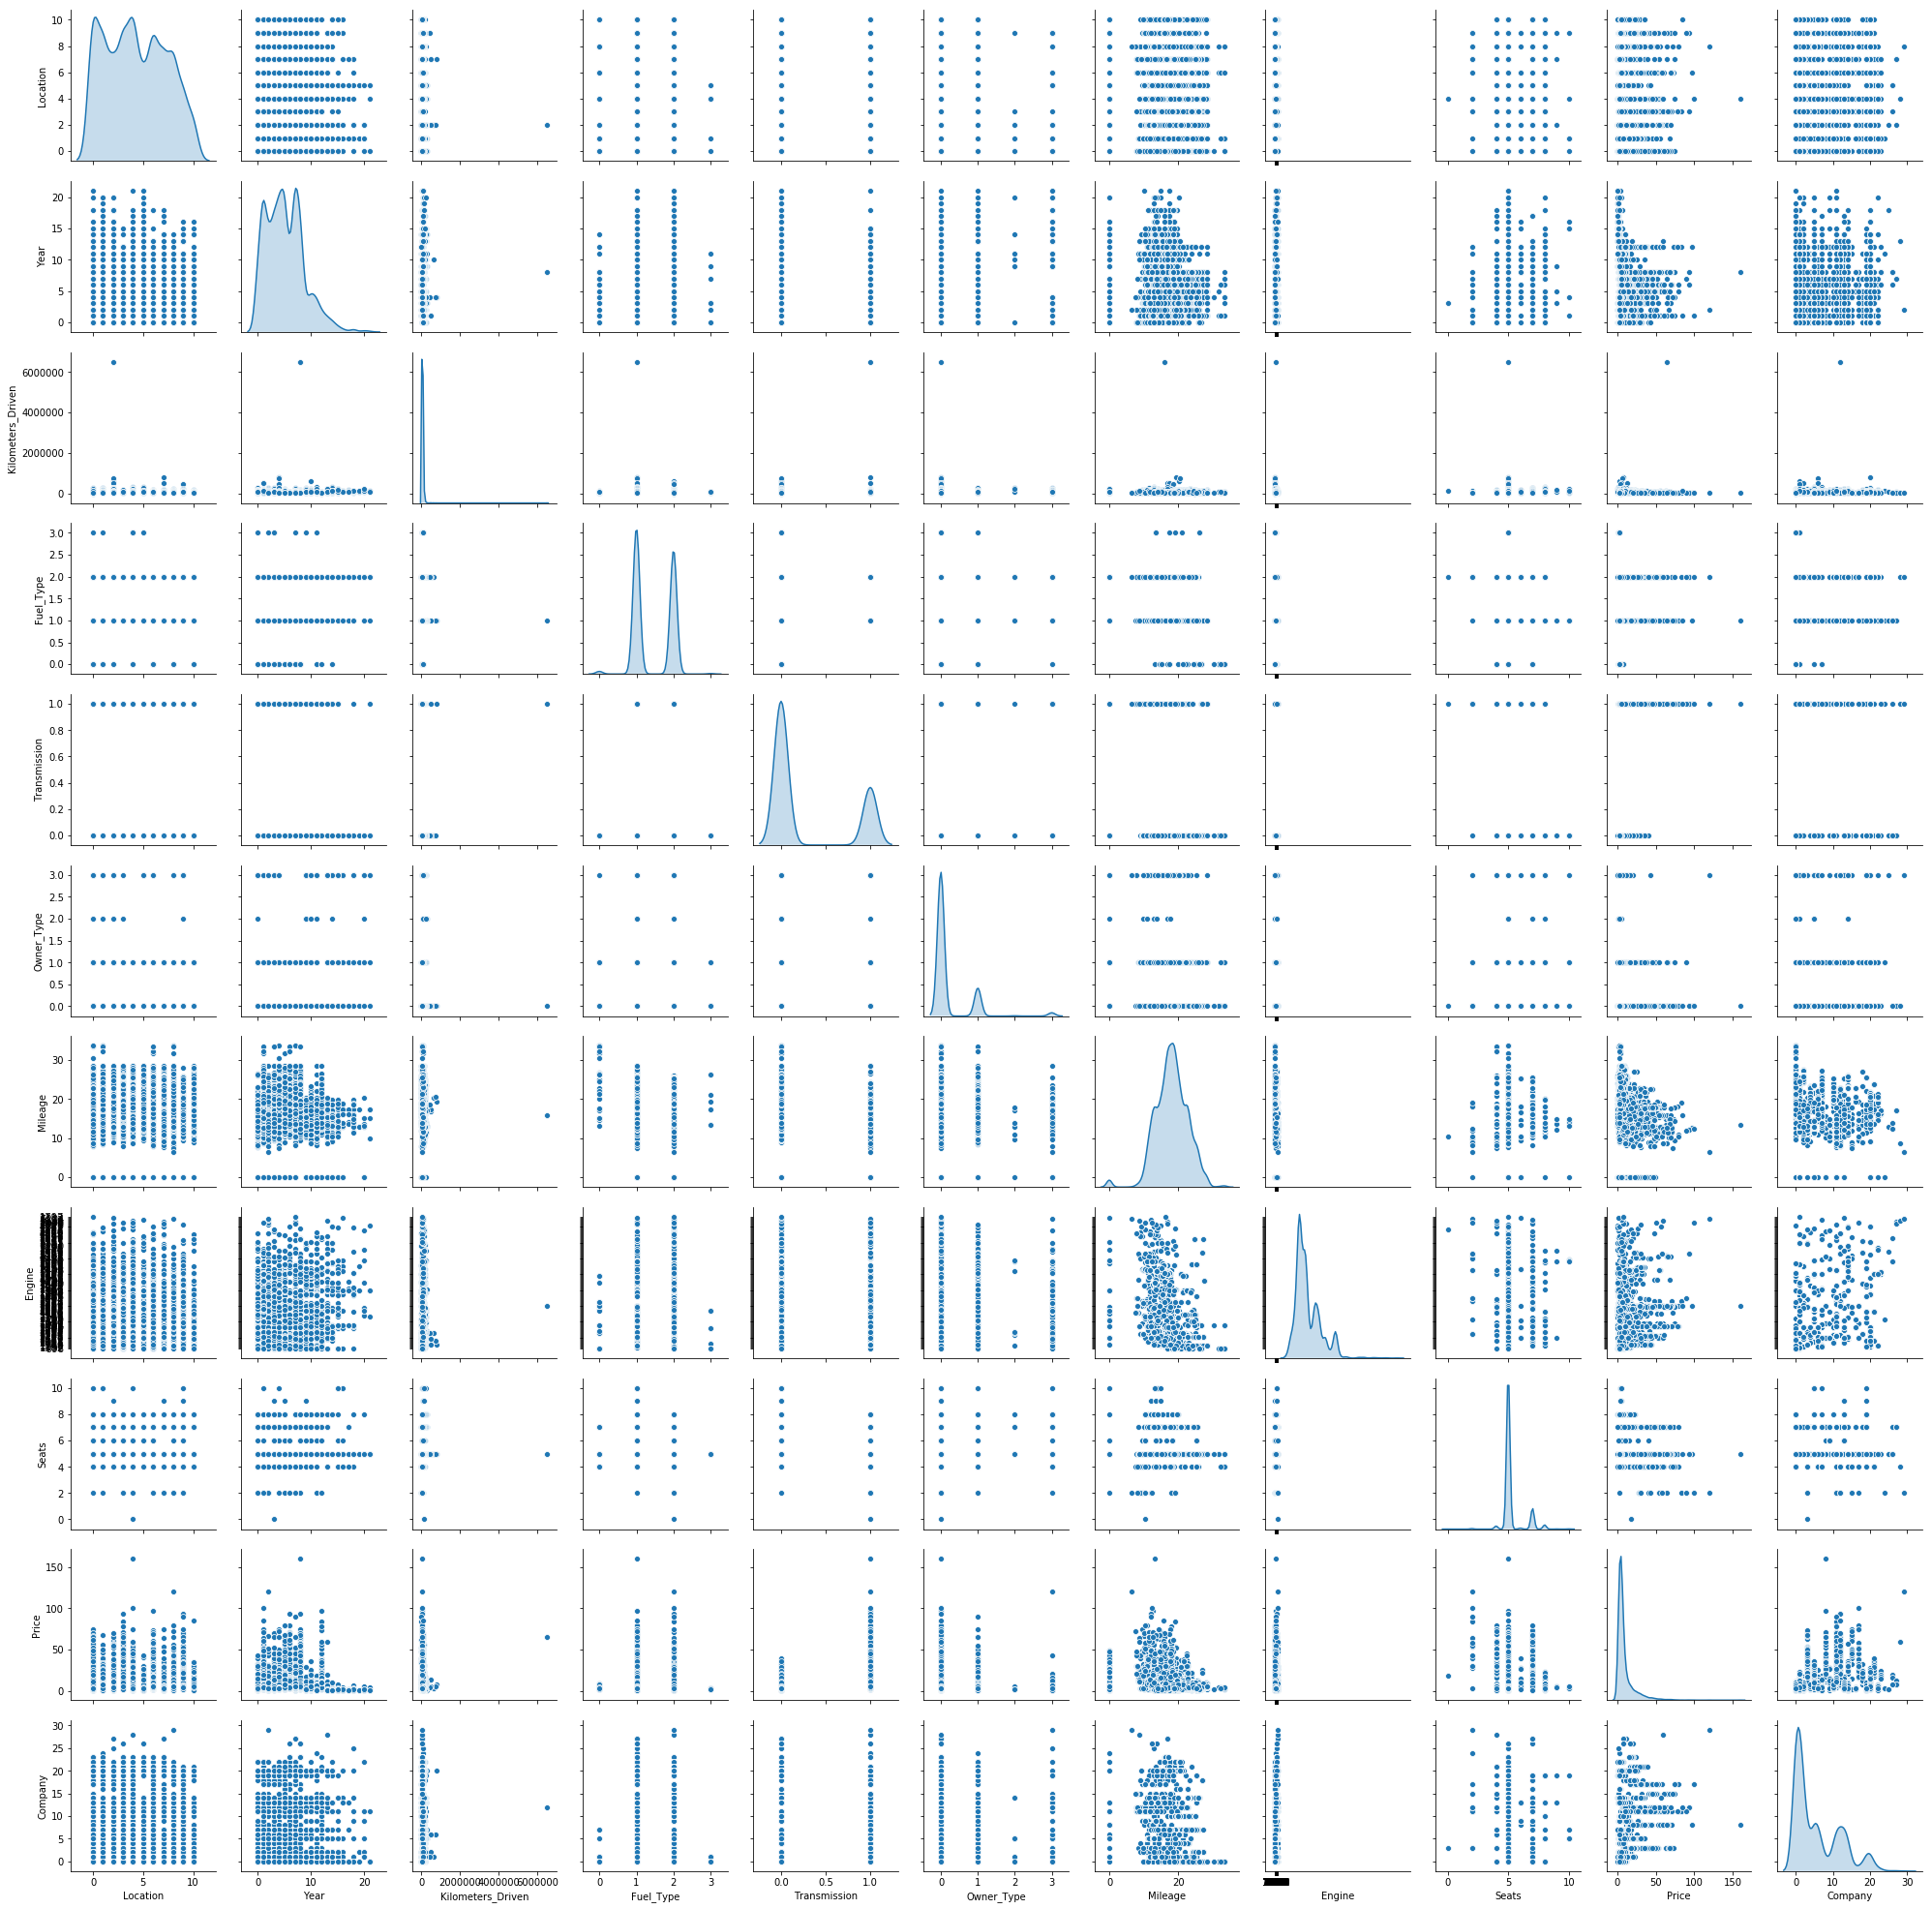

In [0]:
sns.pairplot(clean_data,diag_kind='kde')

In [0]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [0]:
clean_data.Engine = clean_data.Engine.astype('float64')
clean_data.Power = clean_data.Power.astype('float64')
clean_data.Mileage = clean_data.Mileage.astype('float64')

In [0]:
clean_data.Mileage.replace(0,np.nan,inplace=True)
clean_data.dropna(inplace=True)

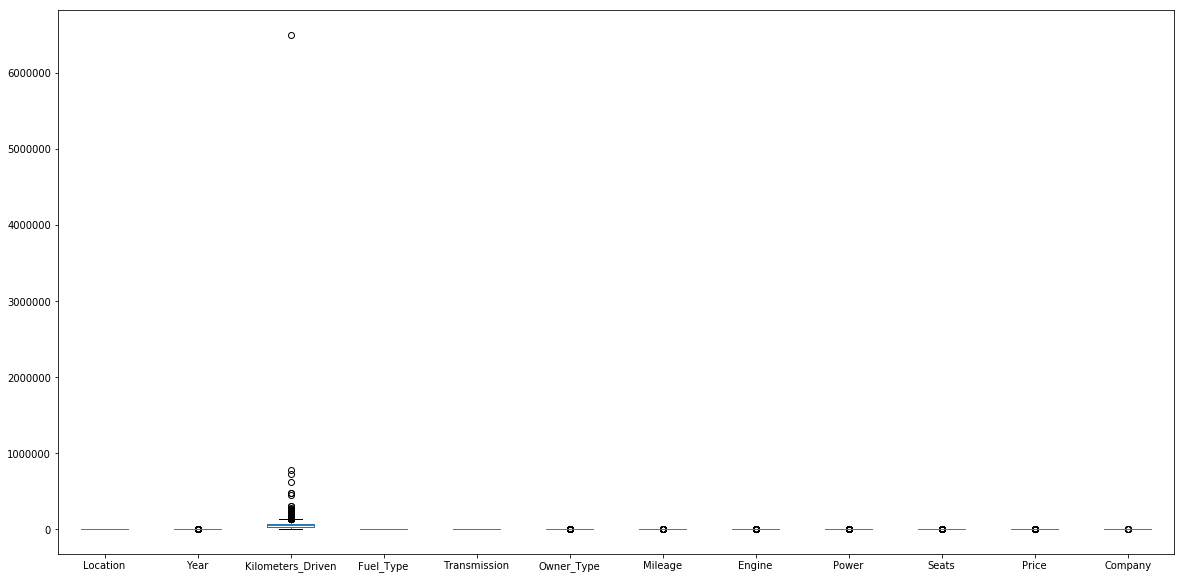

In [0]:
clean_data.plot(kind='box',figsize=(20,10))

In [0]:
z = stats.zscore(clean_data.Kilometers_Driven)

In [0]:
np.where(abs(z)>3)

(array([ 325,  343, 1802, 2258, 2733, 2997, 4359]),)

# Applying various machine learning algorithms including ensemble methods

In [0]:
x = clean_data.drop('Price',axis=1)
y = clean_data.Price
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [0]:
gs_dt.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
x_sc[:,2]

array([0.01105091, 0.00628155, 0.0070508 , ..., 0.00843545, 0.0070508 ,
       0.00720465])

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
RF = RandomForestRegressor(random_state = 0)
params = {'n_estimators':np.arange(10,100),'criterion' : ['mse','mae'],'max_features' : ['log2','sqrt','auto']}
gs_rf = GridSearchCV(RF,params,cv=5)
gs_rf.fit(x_sc,y)
gs_rf.best_est
gs_rf.best_params_

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 91}

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.3,random_state=0)
Rf_best = RandomForestRegressor(n_estimators=91,criterion='mse',max_features='log2',random_state = 0)
Rf_best.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=91,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
Rf_best.score(x_test,y_test)

0.8386135707943396

In [0]:
from sklearn import metrics

In [0]:
for i in range(80,110):
  Rf_ = RandomForestRegressor(n_estimators=i,criterion='mse',max_features='log2',random_state = 0)
  Rf_.fit(x_train,y_train)
  print(np.sqrt(metrics.mean_squared_error(y_test,Rf_.predict(x_test))),Rf_.score(x_test,y_test), i)
  

4.89450327450311 0.8388892237080202 80
4.899010145012524 0.8385923847172222 81
4.895014011346795 0.8388555984357733 82
4.893823002497972 0.8389340051815493 83
4.892112615140302 0.8390465703888352 84
4.892557468848233 0.8390172971520851 85
4.887812266072004 0.839329414129396 86
4.894066121690824 0.8389180016573912 87
4.889236662098392 0.8392357559124471 88
4.895143614680789 0.8388470652106881 89
4.892008554796319 0.8390534176110622 90
4.892652749292146 0.839011026953792 91
4.89494133454349 0.8388603834570248 92
4.891055278782501 0.8391161368668165 93
4.890554012281543 0.839149111983226 94
4.885638100070397 0.8394723193041753 95
4.883365289847181 0.8396216402657495 96
4.882363909981258 0.8396874076964466 97
4.87756506893775 0.8400023930539269 98
4.881756196144444 0.8397273138235197 99
4.886146973105841 0.839438877423843 100
4.8897074151235485 0.8392047965202747 101
4.9045484234840195 0.8382272392784285 102
4.905951105848499 0.8381346932466829 103
4.90785175730704 0.838009250037348 104
4.

In [0]:
knn = KNeighborsRegressor()
params = {'n_neighbors':np.arange(5,100),'weights' : ['uniform','distance'],'algorithm' : ['brute','kd_tree','ball_tree','auto']}
gs_knn = GridSearchCV(knn,params,cv=5)
gs_knn.fit(x_sc,y)
print(gs_knn.best_estimator_)
print(gs_knn.best_params_)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')
{'algorithm': 'brute', 'n_neighbors': 8, 'weights': 'distance'}


KNN with Fold

In [0]:
fold = KFold(n_splits=5,shuffle=True,random_state=0)
for i in range(3,15):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    X_train,X_test=x_sc[train,:],x_sc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]
    et_ = KNeighborsRegressor(algorithm='brute',n_neighbors=i, weights='distance')
    et_.fit(X_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,et_.predict(X_test))))
    r2.append(et_.score(X_test,y_test))
    
  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')

6.001380287989297 (+/-) 0.4393135589220517, 0.7093884242718054 (+/-) 0.0003958079876032445,[3]
5.924130367434864 (+/-) 0.4278802049340852, 0.7172041383531783 (+/-) 0.0001997545148771446,[4]
5.8545099551757875 (+/-) 0.44568526038123757, 0.7238755034588875 (+/-) 0.00026400795003207934,[5]
5.764677735399447 (+/-) 0.4253417986081599, 0.7323393589118444 (+/-) 0.0002114067254824424,[6]
5.753702129809582 (+/-) 0.35837866823735604, 0.7330399810430165 (+/-) 9.94454584524095e-05,[7]
5.753704653454654 (+/-) 0.36996275378748744, 0.7330276888534794 (+/-) 0.00015940575588929332,[8]
5.784007693414205 (+/-) 0.4086793852713367, 0.7304258548734156 (+/-) 0.0001928088711134106,[9]
5.788450396802821 (+/-) 0.40434999876589534, 0.7300802015596194 (+/-) 0.00014513419666010888,[10]
5.7938567080637515 (+/-) 0.46594548804795044, 0.7298621405315157 (+/-) 0.00026855423630686205,[11]
5.788246293291148 (+/-) 0.46192946580169947, 0.7303948912706784 (+/-) 0.00024870588532412456,[12]
5.793193406846152 (+/-) 0.486495379

KNN withount fold

In [0]:
for i in range(3,15):
  knn_ = KNeighborsRegressor(algorithm='brute',n_neighbors=i, weights='distance')
  knn_.fit(x_train,y_train)
  print(np.sqrt(metrics.mean_squared_error(y_test,knn_.predict(x_test))),knn_.score(x_test,y_test),knn_.score(x_train,y_train), i)
  

6.736565507410167 0.6948000781802643 0.9999990836768504 3
6.641024915375001 0.7033956182018851 0.9999990836768504 4
6.532297843568113 0.7130281481512639 0.9999990836768504 5
6.46305961682977 0.7190793481925107 0.9999990836768504 6
6.432079373189572 0.7217660421581328 0.9999990836768504 7
6.493071743034014 0.7164643014858475 0.9999990836768504 8
6.518748240274 0.7142174148187806 0.9999990836768504 9
6.5128513415402445 0.7147342222387272 0.9999990836768504 10
6.534306452368768 0.712851639724539 0.9999990836768504 11
6.557595927892961 0.7108010923368544 0.9999990836768504 12
6.593732176227721 0.7076049948441995 0.9999990836768504 13
6.620859133052462 0.7051941894431002 0.9999990836768504 14


In [0]:
et = ExtraTreesRegressor(random_state=0)
params = {'n_estimators':np.arange(50,100),'criterion' : ['mse','mae']}
gs_et = GridSearchCV(et,params,cv=5)
gs_et.fit(x_sc,y)
print(gs_et.best_estimator_)
print(gs_et.best_params_)

ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)
{'criterion': 'mae', 'n_estimators': 60}


Extra tree with fold

In [0]:
fold = KFold(n_splits=5,shuffle=True,random_state=0)
for i in range(50,70):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    et_ = ExtraTreesRegressor(criterion = 'mae',n_estimators = i,random_state=0)
    et_.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,et_.predict(x_test))))
    r2.append(et_.score(x_test,y_test))
    
  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')
  

3.964745360884076 (+/-) 0.4898815919994807, 0.8730277196092853 (+/-) 0.0006994293963638623,[50]
3.976413007168417 (+/-) 0.49344894506826825, 0.8723038099019271 (+/-) 0.0007036042268304975,[51]
3.967448905764769 (+/-) 0.4857339814956288, 0.8728642430481942 (+/-) 0.0006894463343010795,[52]
3.9741566139701883 (+/-) 0.4850637275591074, 0.8724602178614493 (+/-) 0.0006814068730873381,[53]
3.962676616892378 (+/-) 0.4770949395080176, 0.8732261273294457 (+/-) 0.0006587276768882302,[54]
3.9674559544194046 (+/-) 0.47760761458538115, 0.8729087058991517 (+/-) 0.0006611804487207432,[55]
3.966748765531036 (+/-) 0.4804983774949686, 0.8729574000172546 (+/-) 0.0006686748980854962,[56]
3.9722577529628325 (+/-) 0.4736238408811313, 0.8726422281660687 (+/-) 0.0006490314643647361,[57]
3.9617901869738725 (+/-) 0.46098985966680495, 0.8733164513548287 (+/-) 0.0006203009772436345,[58]
3.961370756337883 (+/-) 0.4591867787367626, 0.8733132200598742 (+/-) 0.0006212698996575872,[59]
3.9575858239631985 (+/-) 0.459767

Linear Regression with fold

In [0]:
fold = KFold(n_splits=5,shuffle=True,random_state=0)
rmse = []
r2 = []
for train,test in fold.split(x_sc,y):
  #rmse = []
  #r2 = []
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  lr_ = LinearRegression()
  lr_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_.predict(x_test))))
  r2.append(lr_.score(x_test,y_test))
    
print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)}')
  

7.74436710856938 (+/-) 3.2966681436191, 0.4406798116662123 (+/-) 0.16566591036882303


In [0]:
for i in range(3,50):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    RF_ = RandomForestRegressor(n_estimators=i,criterion='mse',max_features='log2',random_state = 0)
    RF_.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_.predict(x_test))))
    r2.append(RF_.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


4.9466984734112796 (+/-) 0.5737402076095972, 0.8031353568592007 (+/-) 0.0008194614021273513,[3]
4.750186320118174 (+/-) 0.5664543085155302, 0.8187083541426666 (+/-) 0.000748285482389561,[4]
4.715031969453383 (+/-) 0.5132262980471045, 0.8210595657194737 (+/-) 0.0007093841275922473,[5]
4.600201354570064 (+/-) 0.41357435579502677, 0.8293332201480123 (+/-) 0.0005357755572677993,[6]
4.490090546305172 (+/-) 0.4263678655188475, 0.8373524305358442 (+/-) 0.0005962098276738471,[7]
4.504858659779503 (+/-) 0.41572805150458636, 0.8364461256834991 (+/-) 0.0005030555677639729,[8]
4.464841404385426 (+/-) 0.4003753062968153, 0.8395415666921278 (+/-) 0.00040986438260452284,[9]
4.443413187615755 (+/-) 0.3844816487361006, 0.8410138625222462 (+/-) 0.00038957541262455206,[10]
4.368497402966622 (+/-) 0.37797281047945824, 0.846181119498888 (+/-) 0.00043638793926966703,[11]
4.320896140512099 (+/-) 0.4119788883977863, 0.8496759511966345 (+/-) 0.00048316331785176454,[12]
4.3108864058186755 (+/-) 0.41408260693608

In [0]:
fold = KFold(n_splits=5,shuffle=True,random_state=0)
for train,test in fold.split(x_sc,y):
  rmse = []
  r2 = []
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  DT_ = DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')
  DT_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_.predict(x_test))))
  r2.append(DT_.score(x_test,y_test))
    
  print(f'{np.mean(rmse)}, {np.mean(r2)}')

6.1035604573584425, 0.7468479305767435
5.049746330516642, 0.806188617296383
3.9398546390141305, 0.8298555935663123
5.313880491394005, 0.8103298712926481
5.842310147867011, 0.6774781838183657


In [0]:
for train,test in fold.split(x_sc,y):
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  DT_ = DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')
  DT_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_.predict(x_test))))

print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)}')


5.348610369002874 (+/-) 0.5220911939807036, 0.6774781838183657 (+/-) 0.0


In [0]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,GradientBoostingRegressor
Rf_best = RandomForestRegressor(n_estimators=107,criterion='mse',max_features='log2',random_state = 0)
LR = LinearRegression()
KNN = KNeighborsRegressor(algorithm='brute',n_neighbors=8,weights='distance')
DT = DecisionTreeRegressor(criterion='mae', random_state=0, splitter='best')
ET = ExtraTreesRegressor(criterion = 'mae', n_estimators = 60)
LR_bag = BaggingRegressor(base_estimator=LR)
KNN_bag = BaggingRegressor(base_estimator=KNN)
DT_bag = BaggingRegressor(base_estimator=DT)
LR_boost = AdaBoostRegressor(base_estimator=LR)
DT_boost = AdaBoostRegressor(base_estimator=DT)
gredent_boost = GradientBoostingRegressor()

In [0]:
for i in range(50,100):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    LR_bag = BaggingRegressor(base_estimator=LR, n_estimators=i)
    LR_bag.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,LR_bag.predict(x_test))))
    r2.append(LR_bag.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


7.644100344827829 (+/-) 3.4977003994975817, 0.4506210597396497 (+/-) 0.17088024900596038,[50]
7.67559854056014 (+/-) 3.590757719302359, 0.44475318862036045 (+/-) 0.17772406914124636,[51]
7.703150874278329 (+/-) 3.779482619931531, 0.4383571561544352 (+/-) 0.18815506900330975,[52]
7.714859421133404 (+/-) 3.8501723168489854, 0.43569672701556905 (+/-) 0.1924739829809378,[53]
7.70027736214451 (+/-) 3.845991783513103, 0.4374467876275986 (+/-) 0.19206836902070124,[54]
7.738018668159768 (+/-) 4.056295234037507, 0.4294154188926912 (+/-) 0.2042684410605387,[55]
7.724101072930961 (+/-) 3.9730998110410005, 0.43221942377738215 (+/-) 0.20003067160462554,[56]
7.631046186719217 (+/-) 3.2926065524566517, 0.45586224366263417 (+/-) 0.15959806777632896,[57]
7.689478423994598 (+/-) 3.7076178029267894, 0.4414478982001153 (+/-) 0.18357924059631772,[58]
7.686430355277224 (+/-) 3.6627183493198823, 0.4424205408391314 (+/-) 0.18143455393971578,[59]
7.659597447575233 (+/-) 3.525135480752902, 0.4479244230520834 (+

In [0]:
for i in range(50,100):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    KNN_bag = BaggingRegressor(base_estimator=KNN,n_estimators=i)    
    KNN_bag.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,KNN_bag.predict(x_test))))
    r2.append(KNN_bag.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


5.442447669827158 (+/-) 0.216701884720539, 0.7600960324624705 (+/-) 0.00014770484315233503,[50]
5.439611219544562 (+/-) 0.21066041172569666, 0.7603682698786253 (+/-) 0.00011784787299996659,[51]
5.405928778861397 (+/-) 0.21273327219217478, 0.7633727377207978 (+/-) 0.00010923973969546069,[52]
5.425694408481948 (+/-) 0.20441798329099767, 0.7614524954902541 (+/-) 0.00016002106077369808,[53]
5.431925766570937 (+/-) 0.21712912397866901, 0.76116580125684 (+/-) 8.54204730549273e-05,[54]
5.42197285979766 (+/-) 0.2136125078809689, 0.7619130996242989 (+/-) 0.00013083566728575374,[55]
5.42418662618965 (+/-) 0.21060025967318152, 0.7617360960532649 (+/-) 0.00011236372799150575,[56]
5.422582076779486 (+/-) 0.22733537020665923, 0.7619608836468059 (+/-) 0.00013838015905725257,[57]
5.439023512569091 (+/-) 0.20483403907025557, 0.7603830036359782 (+/-) 0.00011121659774328259,[58]
5.411597618259326 (+/-) 0.21568747143176492, 0.7628004570189698 (+/-) 0.00015393818824434028,[59]
5.4231423055565005 (+/-) 0.21

In [0]:
for i in range(50,100):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    DT_bag = BaggingRegressor(base_estimator=DT,n_estimators=i)    
    DT_bag.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_bag.predict(x_test))))
    r2.append(DT_bag.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


4.1566664661700266 (+/-) 0.4583032552713212, 0.8604234384361078 (+/-) 0.000750713234894401,[50]
4.137970675579259 (+/-) 0.5414687427682805, 0.8614246420165423 (+/-) 0.0010400205628607342,[51]
4.158835663363049 (+/-) 0.38046674455322166, 0.859724481682662 (+/-) 0.0006984071675040931,[52]
4.172072930953256 (+/-) 0.44518570510516514, 0.8594318017135965 (+/-) 0.0007087976821170703,[53]
4.1629736662098065 (+/-) 0.4580901528522361, 0.8602002451133277 (+/-) 0.0007001486032676335,[54]
4.194896875897823 (+/-) 0.5441844110427594, 0.8577906688879876 (+/-) 0.0010068361492055334,[55]
4.143418439148044 (+/-) 0.439486283079262, 0.8609422925449589 (+/-) 0.0008029637678118878,[56]
4.153654463976496 (+/-) 0.40725051645892274, 0.8605343884377449 (+/-) 0.0006457042085114572,[57]
4.138981754720123 (+/-) 0.518818214384409, 0.861485765943826 (+/-) 0.0009476642352237316,[58]
4.129555477351396 (+/-) 0.4766989021311782, 0.8621058716534815 (+/-) 0.000830815190172339,[59]
4.117436433424385 (+/-) 0.471550825262486

KeyboardInterrupt: ignored

In [0]:
for i in range(50,100):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    LR_boost = AdaBoostRegressor(base_estimator=LR,n_estimators=i)    
    LR_boost.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,LR_boost.predict(x_test))))
    r2.append(LR_boost.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


8.743218295704782 (+/-) 9.851508326522259, 0.20675989690737495 (+/-) 0.6357507417542596,[50]
8.48560384411353 (+/-) 7.989888834771047, 0.2614908641957828 (+/-) 0.5171588028791226,[51]
8.704624004749562 (+/-) 12.778177742427559, 0.16567710012174935 (+/-) 0.8925347999876946,[52]
8.890111648736717 (+/-) 13.03445830620564, 0.1315411506064852 (+/-) 0.9548153026598156,[53]
8.609521735799834 (+/-) 11.806064300740713, 0.19370282554643395 (+/-) 0.797872197414901,[54]
8.350936925986662 (+/-) 7.783328651750233, 0.2878998239633215 (+/-) 0.476434186601926,[55]
10.033955628929881 (+/-) 15.192525708340138, 0.03861886107348063 (+/-) 0.5213002700207008,[56]
8.31972446320427 (+/-) 6.320874404876853, 0.31487512454883804 (+/-) 0.37583310438073003,[57]
8.812566992142727 (+/-) 12.168921398375355, 0.15587202169706235 (+/-) 0.8690388610879612,[58]
8.465243901192194 (+/-) 8.80740446977362, 0.25658647473264296 (+/-) 0.5597285087127497,[59]
8.232133606193901 (+/-) 6.307218560297343, 0.3267807315671404 (+/-) 0.36

In [0]:
for i in range(50,100):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    DT_boost = AdaBoostRegressor(base_estimator=DT,n_estimators=i)    
    DT_boost.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_boost.predict(x_test))))
    r2.append(DT_boost.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


4.003612436598436 (+/-) 0.5081359013458531, 0.8703177724933576 (+/-) 0.0008881410639201782,[50]
3.9478736282970055 (+/-) 0.5847903402732951, 0.8734661118849969 (+/-) 0.0011838239630843485,[51]
3.9716485883153942 (+/-) 0.5275236170851159, 0.8724558966493479 (+/-) 0.0009124611192026773,[52]


KeyboardInterrupt: ignored

In [0]:
rmse = []
r2 = []
for train,test in fold.split(x_sc,y):
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  DT_ = AdaBoostRegressor(base_estimator=DT,n_estimators=70) 
  DT_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_.predict(x_test))))

print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}')

4.034271539727532 (+/-) 0.4058538959276968


In [0]:
rmse = []
for train,test in fold.split(x_sc,y):
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  DT_ = AdaBoostRegressor(base_estimator=DT,n_estimators=61) 
  DT_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_.predict(x_test))))

print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}')

4.002296012654191 (+/-) 0.5257686257711288


In [0]:
DT_.score(x_test,y_test)

0.8777282639322453

In [0]:
for i in range(50,100):
  rmse = []
  r2 = []
  for train,test in fold.split(x_sc,y):
    x_train,x_test = x_sc[train,:],x_sc[test,:]
    y_train,y_test = y.iloc[train] , y.iloc[test]
    LR_boost = AdaBoostRegressor(base_estimator=LR,n_estimators=i)    
    LR_boost.fit(x_train,y_train)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,LR_boost.predict(x_test))))
    r2.append(LR_boost.score(x_test,y_test))

  print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)},[{i}]')


9.867336083620895 (+/-) 10.41212442847142, 0.002601397157196894 (+/-) 0.5953855639920278,[50]
8.448370361563494 (+/-) 8.995810415045785, 0.2525181147957233 (+/-) 0.5817729238195286,[51]
8.315065930806007 (+/-) 6.700377462655927, 0.3075005875506963 (+/-) 0.4054389637033585,[52]
8.259986511702168 (+/-) 5.518056894772803, 0.3334305900469131 (+/-) 0.32665301543422354,[53]
9.025620596821177 (+/-) 15.691914453862243, 0.07590441066908611 (+/-) 1.2044352664823366,[54]
9.866555695589508 (+/-) 8.885814706332237, 0.02341727418034565 (+/-) 0.520095786306989,[55]
10.445796362735894 (+/-) 15.618648746861012, -0.17832475873476947 (+/-) 1.0514388647892319,[56]
8.415516017003023 (+/-) 8.1991653061413, 0.27076822216638397 (+/-) 0.517078604267492,[57]
8.121057470654145 (+/-) 6.044163400986229, 0.3431514592127137 (+/-) 0.3520439547142968,[58]
8.558157575313517 (+/-) 10.566453740194524, 0.21774311991207754 (+/-) 0.7003305891345738,[59]
8.218548569490766 (+/-) 7.097905444019602, 0.31732148447190667 (+/-) 0.

In [0]:
clean_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,0,0,72000,0,0,0,26.60,998.0,58.16,5.0,1.75,0
1,1,1,41000,1,0,0,19.67,1582.0,126.20,5.0,12.50,1
2,2,2,46000,2,0,0,18.20,1199.0,88.70,5.0,4.50,2
3,2,3,87000,1,0,0,20.77,1248.0,88.76,7.0,6.00,0
4,3,4,40670,1,1,1,15.20,1968.0,140.80,5.0,17.74,3


In [0]:
data[data.Kilometers_Driven == 6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0


In [0]:
clean_data[clean_data.Kilometers_Driven == 6500000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
2328,2,8,6500000,1,1,0,15.97,2993.0,258.0,5.0,65.0,12


In [0]:
company[12]

'Bmw'

In [0]:
max(clean_data.Kilometers_Driven)

6500000

In [0]:
min(clean_data.Kilometers_Driven)

171

In [0]:
data[data.Kilometers_Driven == 171]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.6


In [0]:
company[0]

'Maruti'

In [0]:
from sklearn.linear_model import Ridge,Lasso

In [0]:
rg_model = Ridge(random_state = 0)
rg_model.fit(x_train,y_train)
rg_model.score(x_test,y_test)

0.6236639752094129

In [0]:
ls_model = Lasso(random_state=0)
ls_model.fit(x_train,y_train)
ls_model.score(x_test,y_test)

0.5874938230650155

In [0]:
rg_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
params = {'alpha':[0.01,0.1,1,10,100],'solver' : ['auto','svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],'max_iter':[500,1000]}
gs_rg = GridSearchCV(rg_model,params,cv=5)
gs_rg.fit(x_sc,y)
print(gs_rg.best_estimator_)
print(gs_rg.best_params_)
gs_rg.best_score_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      random_state=0, solver='sparse_cg', tol=0.001)
{'alpha': 100, 'max_iter': 500, 'solver': 'sparse_cg'}


0.5127521019348932

In [0]:
fold = KFold(n_splits=5,shuffle=True,random_state=0)
rmse=[]
r2=[]
for train,test in fold.split(x_sc,y):
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  Rg_ = Ridge(alpha=.001, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      random_state=0, solver='sparse_cg', tol=0.001)
  Rg_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Rg_.predict(x_test))))
  r2.append(Rg_.score(x_test,y_test))

print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)}')


7.744204061127318 (+/-) 3.2972080585967225, 0.4406949366441026 (+/-) 0.1656801789887464


In [0]:
params = {'alpha':[0.01,0.1,1,10,100],'selection' : ['random','cyclic'],'max_iter':[500,550,600,650,700,750,800,850,900,950,1000]}
gs_rg = GridSearchCV(ls_model,params,cv=5)
gs_rg.fit(x_sc,y)
print(gs_rg.best_estimator_)
print(gs_rg.best_params_)
gs_rg.best_score_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='random',
      tol=0.0001, warm_start=False)
{'alpha': 1, 'max_iter': 500, 'selection': 'random'}


0.60848852435461

In [0]:
rmse=[]
r2=[]
for train,test in fold.split(x_sc,y):
  x_train,x_test = x_sc[train,:],x_sc[test,:]
  y_train,y_test = y.iloc[train] , y.iloc[test]
  Rg_ = Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='random',
      tol=0.0001, warm_start=False)
  Rg_.fit(x_train,y_train)
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Rg_.predict(x_test))))
  r2.append(Rg_.score(x_test,y_test))

print(f'{np.mean(rmse)} (+/-) {np.var(rmse)}, {np.mean(r2)} (+/-) {np.var(r2)}')


6.9683056984672564 (+/-) 0.5948960088547759, 0.6081694073295705 (+/-) 0.0007686613881019543


In [0]:
data_tst = pd.read_excel('/content/drive/My Drive/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_Test.xlsx')

In [0]:
data_tst.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [0]:
location[data_tst.Location]

IndexError: ignored